# Homework 3

## Iris data 

In [8]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

We start with reading the CSV-file and observing the table below. 

In [13]:
df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


From the table abowe we can observe sepal length, sepal width, petal length and petal width for the species Iris-setosa, Iris-virginica and Iris-versicolor. To get a better understanding of the relationship between the variables we create two different scatterplots for the iris flowers. 

<Axes: xlabel='sepal_width', ylabel='petal_width'>

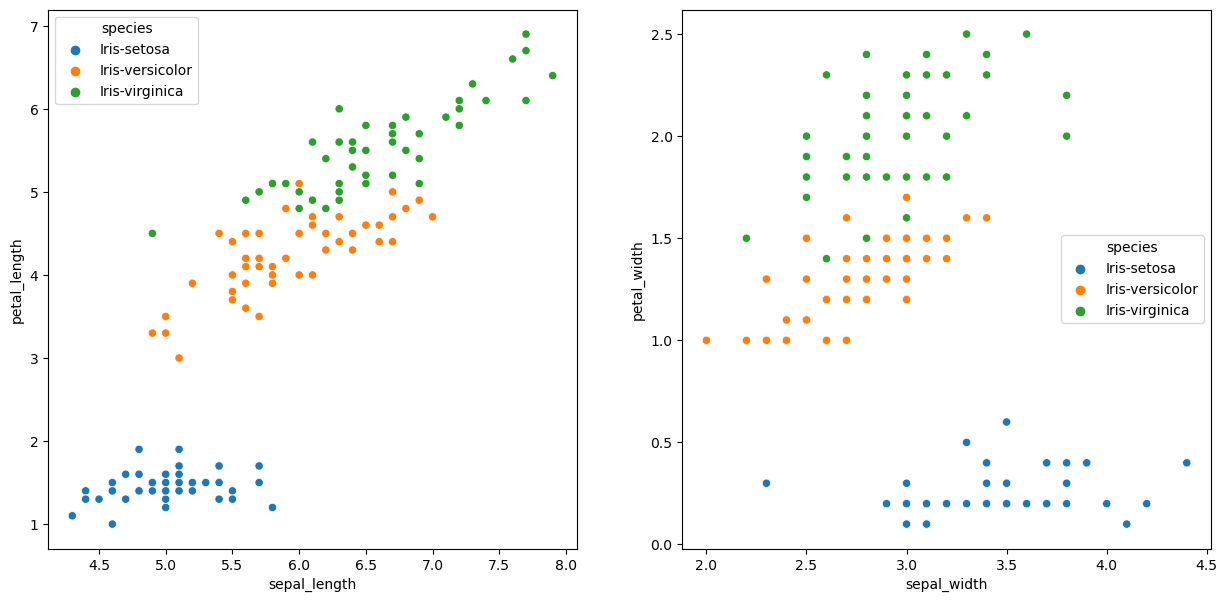

In [17]:
# Creating the scatter plots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
sns.scatterplot(ax=axes[0], x = "sepal_length", y = "petal_length", hue = "species", data=df)
sns.scatterplot(ax=axes[1], x = "sepal_width", y = "petal_width", hue = "species", data=df)

From the scatterplot above we can see that there is positive correlation between sepal length and petal length for Iris-versicolor and Iris-virginica, meaning that as sepal length increases so does petal length. The datapoints for Iris-setosa form a cluster with very limited variation in petal lenght, indicating that changes in petal lenght have little to no impact on sepal length for Iris-setosa. While there is a correlation between petal width and sepal width, it isn't as strong and the clusters aren't as defined, especially for Iris-versicolor and Iris-virginica. 

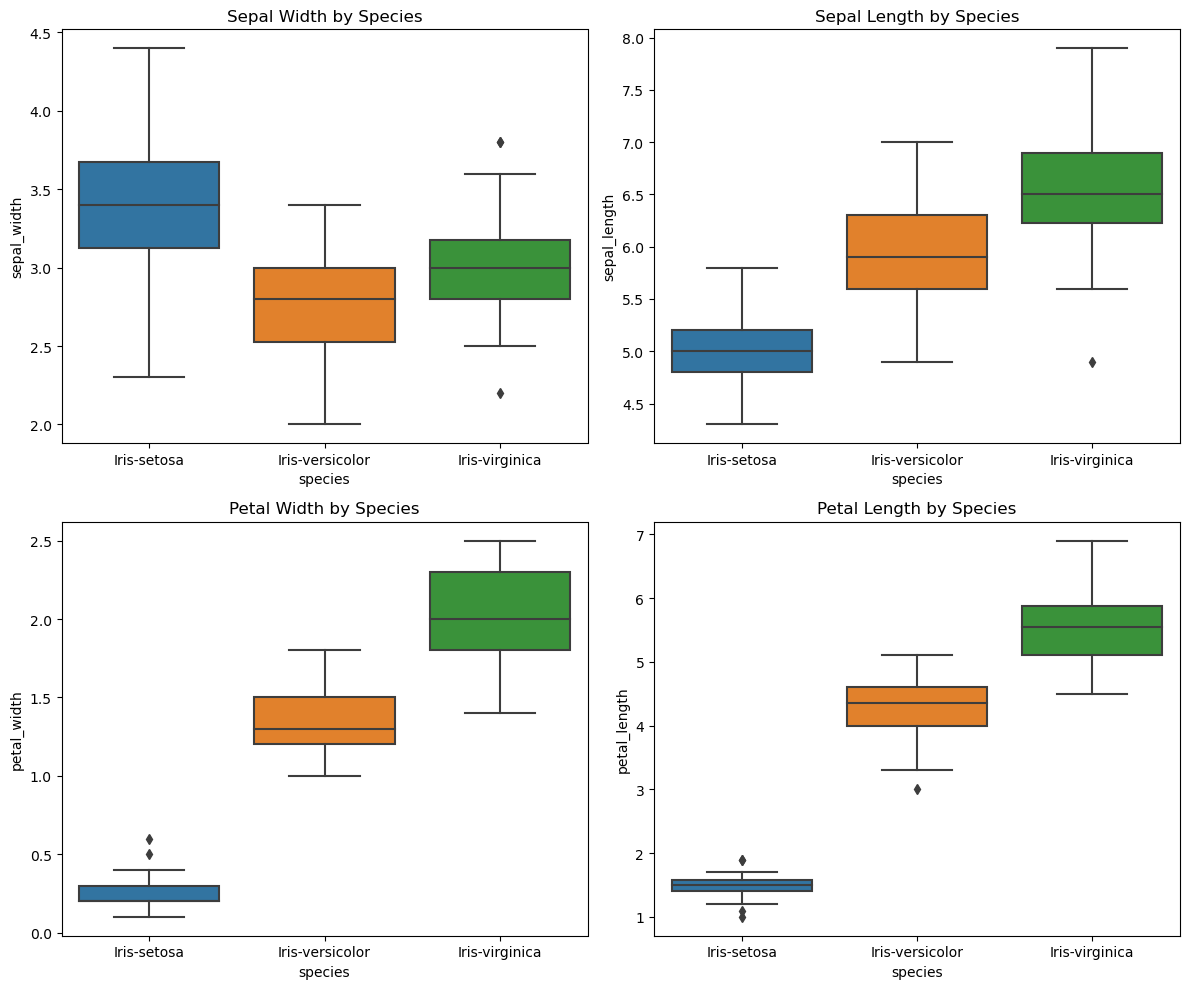

In [21]:
# Create boxplots
plt.figure(figsize=(12, 10))

# Sepal Width by Species
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x="species", y="sepal_width")
plt.title("Sepal Width by Species")

# Sepal Length by Species
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x="species", y="sepal_length")
plt.title("Sepal Length by Species")

# Petal Width by Species
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x="species", y="petal_width")
plt.title("Petal Width by Species")

# Petal Length by Species
plt.subplot(2, 2, 4)
sns.boxplot(data=df, x="species", y="petal_length")
plt.title("Petal Length by Species")

plt.tight_layout()
plt.show()

The boxplots show clear differences in sepal and petal dimensions across the three species. For instance, Iris-setosa has the smallest petal length and width, as well as short sepal length but wide sepals, making it easy to distinguish. On the other hand, Iris-versicolor and Iris-virginica are quite similar in size, but Iris-virginica tends to have slightly larger sepal and petal dimensions overall. 

In [ ]:
We now want to create a pairs plot to get a better understanding of the relationship between data. 

/Users/alvarmikkola/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


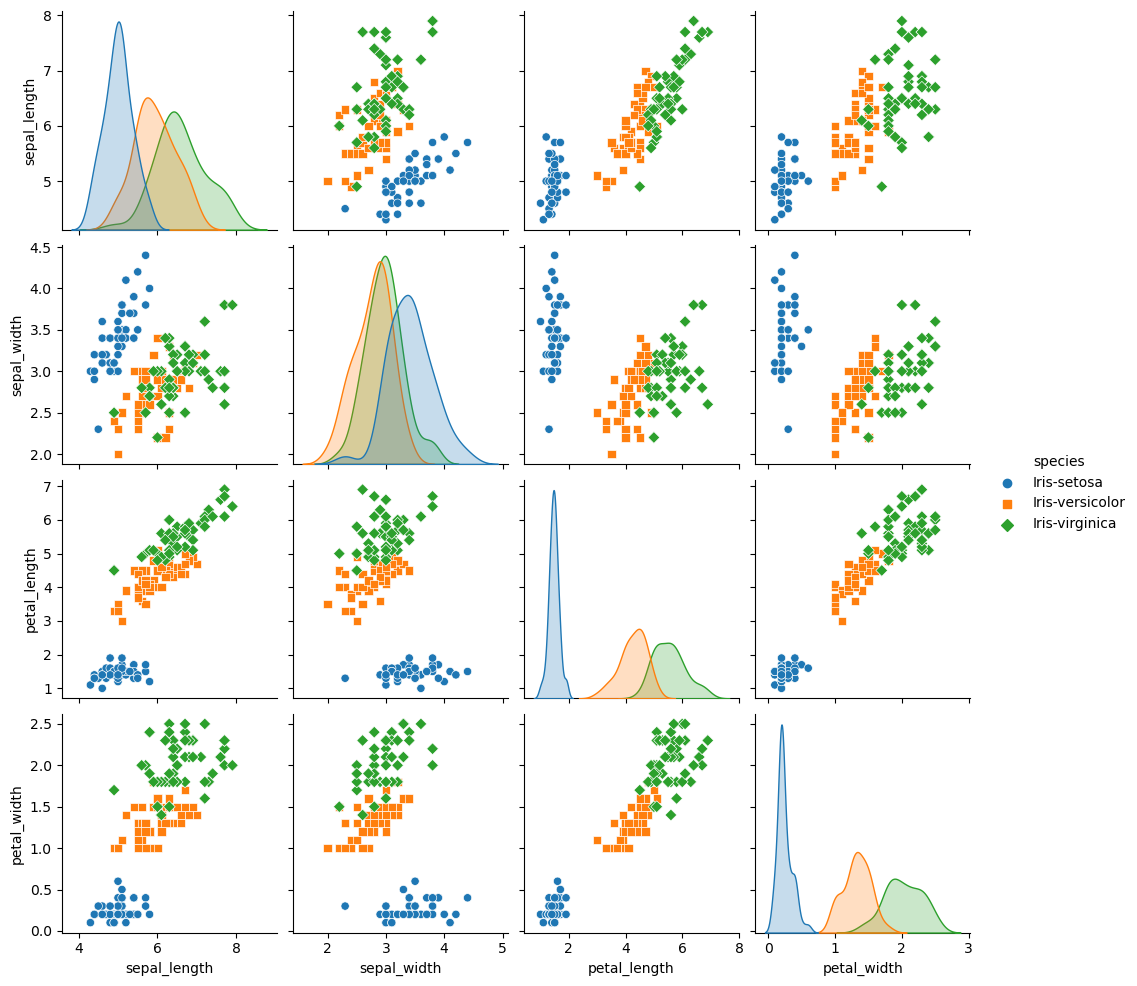

In [37]:
# Create the pairs plot
sns.pairplot(data=df, hue='species', diag_kind='kde', markers=['o', 's', 'D'])
plt.show()

From the pairs plot above we can observe that petal dimensions show a strong positive correlation for Iris-versicolor and Iris-virginica, clearly separate from Iris-setosa, which forms its own cluster. Sepal dimensions show weaker correlations, with significant overlap between Iris-versicolor and Iris-virginica where Iris-setosa remains separate. The diagonal plots highlight that petal dimensions are the most defining features as their distributions are well-separated, unlike the overlapping sepal dimensions.

## Birdwatching 

We start of by reading the CSV file. 

In [13]:
df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/artportalen.csv")

In [ ]:
We are now interested in determining which bird species are the most prevalent. 

In [21]:
# Change the 'Antal' column to numeric values and replace any non-numeric entries with NaN
df['Antal'] = pd.to_numeric(df['Antal'], errors='coerce')

# The most prevalent species after the cleaning
most_prevalent_species = df.groupby('Artnamn')['Antal'].sum().sort_values(ascending=False)
most_prevalent_species_top5 = most_prevalent_species.head()
most_prevalent_species_top5


Artnamn
Grönsiska        20211.0
Sothöna           8308.0
Gräsand           7167.0
Storskrake        6750.0
Vitkindad gås     6345.0
Name: Antal, dtype: float64

Grönsiska was the most prevalent species, recorded 20211 times, followed by Sothöna with 8308 observations and Gräsand with 7167. To better understand the distribution of these species, we use the following code:

In [27]:
# Change 'Startdatum' to datetime format and use it to create a 'Month' column.
df['Startdatum'] = pd.to_datetime(df['Startdatum'], errors='coerce')

# Get the month and year from 'Startdatum' and save it in the 'Month' column
df['Month'] = df['Startdatum'].dt.to_period('M')

# Monthly distribution for the top 3 species
top3_monthly_distribution = df[df['Artnamn'].isin(top_3_species)].groupby(['Month', 'Artnamn'])['Antal'].sum().unstack(fill_value=0)
top3_monthly_distribution

Artnamn,Gräsand,Grönsiska,Sothöna
Month,,,
2022-01,2953.0,19507.0,2142.0
2022-02,1583.0,648.0,2100.0
2022-03,1152.0,33.0,3052.0
2022-04,858.0,6.0,614.0
2022-05,515.0,10.0,288.0
2022-06,106.0,7.0,112.0


From the table above, we can observe that the highest number of observations were typically made during the winter months. We now want to calculate the rarest species which is done below. 

In [45]:
# Group by 'Artnamn', sum the 'Antal' column and sort to identify the least common species
df.groupby("Artnamn")["Antal"].sum().sort_values(ascending=True).head(20)


Artnamn
Ob. korsnäbb                 0.0
Fjällvråk                    1.0
Lappsparv                    1.0
Varfågel                     1.0
Gravand                      1.0
Forsärla                     1.0
Tornfalk                     1.0
Spillkråka                   1.0
Trädlärka                    1.0
Ejder                        1.0
Ormvråk, underarten buteo    1.0
Rosenfink                    1.0
Storlom                      1.0
Bivråk                       1.0
Röd glada                    1.0
Strömstare                   1.0
Rödbena                      1.0
Bändelkorsnäbb               1.0
Ägretthäger                  1.0
Vinterhämpling               1.0
Name: Antal, dtype: float64

The data shows 20 species with the lowest recorded counts. Nineteen species were observed only once while one species, Ob. korsnäbb, had no recorded observations. This suggests that these species are either rarely present or are difficult to detect for numerous reasons.

To get a even better understanding of the dataset we want to answer the following questions:  
1. Which bird species have the highest average group size per observation?
2. Which municipality had the lowest number of observations?
3. What are the most common species in Stockholm?

Which bird species have the highest average group size per observation?

In [100]:

# Total number of observations and the total count of individuals for each species
species_group_size = df.groupby('Artnamn')['Antal'].agg(['sum', 'count'])

# Average group size for each species
species_group_size['Average Group Size'] = species_group_size['sum'] / species_group_size['count']

# Species by average group size in descending order
highest_average_group_size = species_group_size.sort_values(by='Average Group Size', ascending=False)

highest_average_group_size.head()


,sum,count,Average Group Size
Artnamn,,,
Mellanskarv,200.0,1,200.000000
Måsfåglar,200.0,1,200.000000
Grönsiska,20211.0,215,94.004651
Prutgås,40.0,1,40.000000
Sidensvans,1287.0,52,24.750000


Mellanskarv and Måsfåglar have the highest average group size per observation, with 200. However, they were only observed once, which makes this result seem unlikely. This could mean there is a typo or an estimate in the data that needs to be checked.

In [ ]:
Which municipality had the lowest number of observations?

In [105]:
# Calculate the total number of observations in each municipality
observations_per_kommun = df.groupby('Kommun')['Antal'].sum().sort_values()
observations_per_kommun.head()


Kommun
Lidingö        1439.0
Sollentuna     6434.0
Solna         15361.0
Stockholm     92561.0
Name: Antal, dtype: float64

The table above shows that Lidingö had the fewest observations. This could be due to several reasons, for instance it's geographical location, the number of birdwatching enthusiasts in the area or the municipality's size.

What are the most common species in Stockholm?

In [107]:
# Observations only in Stockholm
stockholm_data = df[df['Kommun'] == 'Stockholm']

# Total number of observations for each species in Stockholm
common_species_stockholm = stockholm_data.groupby('Artnamn')['Antal'].sum().sort_values(ascending=False)

common_species_stockholm.head()


Artnamn
Grönsiska        18783.0
Sothöna           7504.0
Gräsand           5958.0
Storskrake        5884.0
Vitkindad gås     5179.0
Name: Antal, dtype: float64

Grönsiska is by far the most observed bird species in the capital with a total of 18,783 individuals recorded in Stockholm. Across all locations in the dataset, this species was observed a total of 20,211 times, showing that Grönsiska is very common in the municipality.

## Predicting Strokes

We start of by reading the CSV file. 

In [111]:
stroke_data = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv")
stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


As we can see the dataset providesinformation about individuals and their stroke history. To explore it further, we will answer the following questions:  
1. How does smoking impact stroke occurences? 
2. How does heart disease impact the likelihood of having a stroke?
3. Are there gender differences in stroke cases?

How does smoking impact stroke occurences?

In [126]:
# Percentage of strokes for each smoking status category
smoking_stroke = stroke_data.groupby('smoking_status')['stroke'].mean() * 100
smoking_stroke

smoking_status
Unknown            3.044041
formerly smoked    7.909605
never smoked       4.756871
smokes             5.323194
Name: stroke, dtype: float64

The results show that people who used to smoke have the highest risk of stroke at 7.91%. Current smokers also have a slightly higher risk at 5.32% compared to non-smokers who had a 4.76% risk. The "Unknown" group has the lowest rate (3.04%), likely because of missing data. This suggests that smoking increases the risk of having a stroke. 

How does heart disease impact the likelihood of having a stroke?

In [124]:
# Percentage of strokes for individuals with and without heart disease
heart_disease_stroke = stroke_data.groupby('heart_disease')['stroke'].mean() * 100
heart_disease_stroke

heart_disease
0     4.178734
1    17.028986
Name: stroke, dtype: float64

The results show that 17.03% of individuals with heart disease experienced a stroke compared to 4.18% without heart disease. This suggests that heart disease significantly increases the risk of having a stroke risk, however other factors like age or lifestyle might also affect this. 

Are there gender differences in stroke cases?

In [121]:
# Percentage of strokes within each gender
gender_stroke = stroke_data.groupby('gender')['stroke'].mean() * 100
gender_stroke


gender
Female    4.709419
Male      5.106383
Other     0.000000
Name: stroke, dtype: float64

As shown above, 4.71% of females in the dataset have had a stroke compared to 5.11% of males. This small difference shows that gender does not have a notable impact on the likelihood of having a stroke. In the "Other" category, no strokes were recorded likely because the sample size is very small.

## Cleaning Data

We start of by reading the CSV file 

In [168]:
df = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/cell_phones_total.csv")
df

,iso-3,1960,1965,1966,1967,1968,1969,1970,1971,1972,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ABW,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,132k,NaN,135k,139k,140k,141k,NaN,NaN,NaN,NaN
1,AFG,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,10.2M,13.8M,15.3M,16.8M,18.4M,19.7M,21.6M,23.9M,22M,22.6M
2,AGO,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,9.4M,12.1M,12.8M,13.3M,14.1M,13.9M,13M,13.3M,13.3M,14.8M
3,ALB,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,2.69M,3.1M,3.5M,3.69M,3.36M,3.4M,3.37M,3.63M,2.71M,2.63M
4,AND,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,65.5k,65k,63.9k,63.9k,66.2k,71.3k,76.1k,80.3k,82.6k,87.9k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,562k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,YEM,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,11.1M,11.7M,13.9M,16.8M,17.1M,15M,16.4M,15.4M,15.3M,NaN
211,ZAF,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,50.4M,64M,68.4M,76.9M,79.3M,88M,82.4M,88.5M,92.4M,97M
212,ZMB,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,5.45M,8.16M,10.5M,10.4M,10.1M,11.6M,12M,13.4M,15.5M,17.2M


We see that the file contains a lot of missing values. To get a better understanding of the data before cleaning we use df.info() to get information about each column and df.isnull().sum() to check for missing values in each column.

In [173]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   iso-3   214 non-null    object 
 1   1960    200 non-null    float64
 2   1965    200 non-null    float64
 3   1966    0 non-null      float64
 4   1967    0 non-null      float64
 5   1968    0 non-null      float64
 6   1969    0 non-null      float64
 7   1970    200 non-null    float64
 8   1971    0 non-null      float64
 9   1972    0 non-null      float64
 10  1973    0 non-null      float64
 11  1974    0 non-null      float64
 12  1975    200 non-null    float64
 13  1976    200 non-null    float64
 14  1977    200 non-null    float64
 15  1978    200 non-null    float64
 16  1979    200 non-null    float64
 17  1980    200 non-null    object 
 18  1981    199 non-null    object 
 19  1982    199 non-null    object 
 20  1983    198 non-null    object 
 21  1984    196 non-null    object 
 22  19

iso-3      0
1960      14
1965      14
1966     214
1967     214
1968     214
1969     214
1970      14
1971     214
1972     214
1973     214
1974     214
1975      14
1976      14
1977      14
1978      14
1979      14
1980      14
1981      15
1982      15
1983      16
1984      18
1985      19
1986      18
1987      20
1988      19
1989      21
1990       7
1991      18
1992      16
1993      16
1994      16
1995      14
1996      13
1997      14
1998      12
1999      11
2000      10
2001      10
2002       8
2003       8
2004       7
2005      10
2006      13
2007      10
2008      12
2009      10
2010       7
2011      11
2012       7
2013      10
2014       9
2015       7
2016      12
2017      10
2018      32
2019      71
dtype: int64

In [ ]:
Since the dataset contains strings we'll convert these to numbers. 

In [181]:
year_columns = df.columns[1:]  # All columns except the first one since iso-3 represents the country identifier
def convert_str_to_number(x):
        if pd.isnull(x):
            return x  # return nan unchanged
            x = x.strip()  # Remove extra whitespaces
        if isinstance(x, str):
            if x.endswith('k'):
                return float(x[:-1]) * 1e3
            elif x.endswith('M'):
                return float(x[:-1]) * 1e6
            elif x.endswith('B'):
                return float(x[:-1]) * 1e9
        try:
            return float(x)  # Convert numeric strings to float
        except:
            return pd.NA  # if conversion fails return missing value nan 


We now want to apply the conversion functions to year columns and check that the year columns are numerical.

In [187]:
for col in year_columns:
    df[col] = df[col].apply(convert_str_to_number)

df[year_columns].dtypes

1960    float64
1965    float64
1966    float64
1967    float64
1968    float64
1969    float64
1970    float64
1971    float64
1972    float64
1973    float64
1974    float64
1975    float64
1976    float64
1977    float64
1978    float64
1979    float64
1980    float64
1981    float64
1982    float64
1983    float64
1984    float64
1985    float64
1986    float64
1987    float64
1988    float64
1989    float64
1990    float64
1991    float64
1992    float64
1993    float64
1994    float64
1995    float64
1996    float64
1997    float64
1998    float64
1999    float64
2000    float64
2001    float64
2002    float64
2003    float64
2004    float64
2005    float64
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016    float64
2017    float64
2018    float64
2019    float64
dtype: object

We fill the missing values by doing forward and backward filling since we are assuming that if value is missing, the number of cell phones is equal to or slightly larger than the last recorded value. Whether using a backwards or forward fill is appropriate depends on the dataset and the specific goal of the analysis. Since we in this case want a better understanding of cell phone usage across different countries, this approach seems appropriate. 

In [189]:
# Forward fill
df[year_columns] = df[year_columns].fillna(method='ffill', axis=1)

# Backward fill
df[year_columns] = df[year_columns].fillna(method='bfill', axis=1)

df.isnull().sum())



Missing Values After Filling:
iso-3    0
1960     0
1965     0
1966     0
1967     0
1968     0
1969     0
1970     0
1971     0
1972     0
1973     0
1974     0
1975     0
1976     0
1977     0
1978     0
1979     0
1980     0
1981     0
1982     0
1983     0
1984     0
1985     0
1986     0
1987     0
1988     0
1989     0
1990     0
1991     0
1992     0
1993     0
1994     0
1995     0
1996     0
1997     0
1998     0
1999     0
2000     0
2001     0
2002     0
2003     0
2004     0
2005     0
2006     0
2007     0
2008     0
2009     0
2010     0
2011     0
2012     0
2013     0
2014     0
2015     0
2016     0
2017     0
2018     0
2019     0
dtype: int64


The data is now cleaned, however for better readability we reset the index and show the 10 countries with most cell phone users between the years 2015 and 2019. 

In [201]:
selected_years = ['2015', '2016', '2017', '2018', '2019']
cleaned_df = df[['iso-3'] + selected_years]

# Sort the years in descending order
sorted_df = cleaned_df.sort_values(by='2015', ascending=False)

# Reset index
sorted_df.reset_index(drop=True, inplace=True)

sorted_df.head(10)



,iso-3,2015,2016,2017,2018,2019
0,CHN,1290000000,1360000000,1470000000,1650000000,1730000000
1,IND,1000000000,1130000000,1170000000,1180000000,1150000000
2,USA,382000000,396000000,400000000,422000000,422000000
3,IDN,339000000,386000000,435000000,319000000,345000000
4,BRA,258000000,244000000,218000000,207000000,207000000
5,RUS,227000000,229000000,227000000,229000000,240000000
6,JPN,161000000,167000000,173000000,180000000,180000000
7,NGA,151000000,154000000,145000000,173000000,173000000
8,BGD,131000000,136000000,151000000,162000000,166000000
9,PAK,126000000,136000000,145000000,154000000,165000000


As seen above, China shows a big increase in the number of cell phones over the years reaching approximately 1730000000 in 2019. This growth is likely because of its large population and fast use of technology.